Alireza Kheirandish

Student Number : 97101604

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import DataLoader
import torch.utils.data as data
import random
import torchvision.transforms as transforms

In [33]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [43]:
test = pd.read_csv("./Data/HW2_data/Q3_test.csv")
train = pd.read_csv("./Data/HW2_data/Q3_train.csv")

X_train, y_train = np.array(train)[:, 1:].astype(float), np.array(train)[:, 0]
X_test, y_test = np.array(test)[:, 1:].astype(float), np.array(test)[:, 0]

In [71]:
train.shape
# temp[1,:]

(27455, 785)

In [45]:
N = train.shape[0]
arr = np.arange(N)
np.random.shuffle(arr)
rnd = arr[0:9]


In [46]:
label = { 0 : 'A' , 1 : 'B' , 2 : 'C' , 3 : 'D' , 4 : 'E' , 5 : 'F' , 6 : 'G' , 7  : 'H' , 8 : 'I' ,  9 : 'J'  , 10 : 'K'  , 11 : 'L' , 12 : 'M' , 13 : 'N' , 14 : 'O' , 15 : 'P' ,
         16  : 'Q' , 17 : 'R' , 18 : 'S' , 19 : 'T' , 20 : 'U' , 21 : 'V' , 22 : 'W' , 23 : 'X' , 24  : 'Y'}

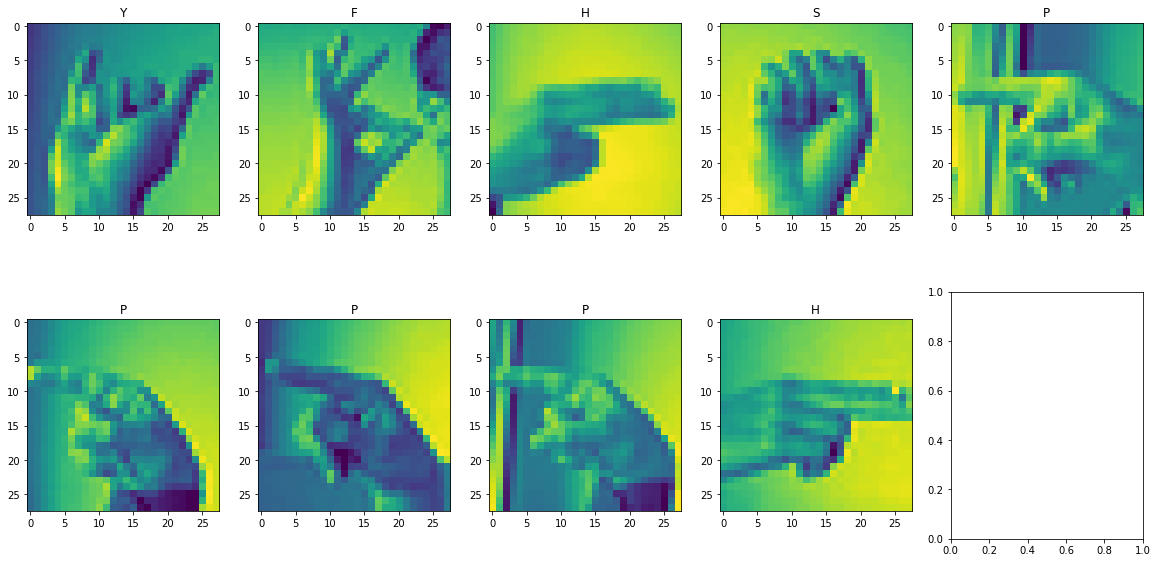

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=5,figsize = (20,10))
temp =  np.array(train)
counter = 0
for i in rnd:
#     print(i)
    ax[counter//5,counter-5*(counter>4)].imshow((temp[i,1:]).reshape(28,28))
    ax[counter//5,counter-5*(counter>4)].set_title(label[temp[i,0]])
    counter += 1



In [49]:

mu = X_train.mean()
sigma = X_train.std()
transform_norm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mu, sigma)
])

train_images = [X_train[row].reshape((28, 28)) for row in range(X_train.shape[0])]
train_images_normalized = [transform_norm(img) for img in train_images]
test_images = [X_test[row].reshape((28, 28)) for row in range(X_test.shape[0])]
test_images_normalized = [transform_norm(img) for img in test_images]



In [300]:

N = train.shape[0]
sampleSize = np.int(0.85*N // 1)

from torch.utils.data import TensorDataset, random_split, DataLoader
training_dataset = TensorDataset(torch.cat(train_images_normalized, dim=0), torch.LongTensor(y_train))
test_dataset = TensorDataset(torch.cat(test_images_normalized, dim=0), torch.LongTensor(y_test))
training_dataset, validation_dataset = random_split(training_dataset, [sampleSize, len(training_dataset) - sampleSize])


In [301]:
# training_dataset[:][1].shape

In [302]:
import torch.nn as nn
class NeuralNetwork(nn.Module):
    def __init__(self, optimizer="SGD", lr = 0.001):
        super(NeuralNetwork, self).__init__()

        
        layers = [
        nn.Linear(784, 512),
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 64),
        nn.ReLU(),
        nn.Linear(64, 25)]
        self.model = nn.Sequential(*layers)
        
        torch.nn.init.xavier_normal_(self.model[0].weight)
        torch.nn.init.xavier_normal_(self.model[2].weight)
        torch.nn.init.xavier_normal_(self.model[4].weight)  
        torch.nn.init.xavier_normal_(self.model[6].weight)      
        torch.nn.init.xavier_normal_(self.model[8].weight)
        torch.nn.init.xavier_normal_(self.model[10].weight)
        torch.nn.init.xavier_normal_(self.model[12].weight)

        
        self.criterion = nn.CrossEntropyLoss()
        
        if optimizer == "ADAM":
            self.optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
        else:
            self.optimizer = torch.optim.SGD(self.model.parameters(), lr=lr, momentum=0.4)

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
    def evaluate(self, evaluation_data, batch_size):
        self.eval()
        evaluation_loader = DataLoader(evaluation_data, batch_size=batch_size, shuffle=False)
        x, y = iter(evaluation_loader).next()

        with torch.no_grad():
            outputs = self.model(x.reshape((-1, 784)).float())
            loss = np.array(self.criterion(outputs, y))
            loss = np.int(loss*10000)/10000
            predicted = torch.argmax(outputs, dim=-1)
            accuracy = np.array(torch.sum(predicted == y) / y.shape[0])*100
            accuracy = np.int(accuracy*10000)/10000

        return accuracy, loss

    def fit(self, train_data, test_data, batch_size=64, n_epoch=12):
        
        train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

        train_acc = []
        test_acc = []
        train_loss = []
        test_loss = []

        self.train()
        for epoch in range(n_epoch):
            for _, data in enumerate(train_loader):
                xb, yb = data[0].reshape((-1, 784)).float(), data[1]
                output = self.model(xb)
                self.optimizer.zero_grad()
                loss = self.criterion(output, yb)
                loss.backward() 
                self.optimizer.step()
            
            train_acc_epoch, train_loss_epoch = self.evaluate(train_data, len(train_data))
            test_acc_epoch, test_loss_epoch = self.evaluate(test_data, len(test_data))
            train_acc.append(train_acc_epoch)
            train_loss.append(train_loss_epoch)
            test_acc.append(test_acc_epoch)
            test_loss.append(test_loss_epoch)
            print(f"#{epoch+1}: train_acc={train_acc_epoch}%, valid_acc={test_acc_epoch}%, train_loss={train_loss_epoch}, valid_loss={test_loss_epoch}")
        return test_acc, test_loss, train_acc, train_loss

In [209]:
n_epochs = 20
batch_size = 64
SGD_NODROP = NeuralNetwork()
v_a_S_NODROP, v_l_S_NODROP, t_a_S_NODROP, t_l_S_NODROP = SGD_NODROP.fit(training_dataset, validation_dataset, batch_size, n_epochs)
torch.save(SGD_NODROP.state_dict(),'SGD_NODROP.pt')

#1: train_acc=9.1232%, valid_acc=8.7885%, train_loss=3.1509, valid_loss=3.1553
#2: train_acc=15.4782%, valid_acc=15.0036%, train_loss=3.045, valid_loss=3.0536
#3: train_acc=20.2648%, valid_acc=20.0776%, train_loss=2.8481, valid_loss=2.8648
#4: train_acc=29.3323%, valid_acc=29.4731%, train_loss=2.5266, valid_loss=2.5481
#5: train_acc=43.1479%, valid_acc=43.0201%, train_loss=2.0932, valid_loss=2.1188
#6: train_acc=57.6319%, valid_acc=56.1544%, train_loss=1.6364, valid_loss=1.6669
#7: train_acc=66.7552%, valid_acc=64.9672%, train_loss=1.2778, valid_loss=1.3179
#8: train_acc=74.3143%, valid_acc=71.7892%, train_loss=1.0037, valid_loss=1.0504
#9: train_acc=80.4979%, valid_acc=78.9512%, train_loss=0.7921, valid_loss=0.8364
#10: train_acc=85.1731%, valid_acc=83.5396%, train_loss=0.6339, valid_loss=0.6751
#11: train_acc=88.7855%, valid_acc=87.7397%, train_loss=0.5055, valid_loss=0.5457
#12: train_acc=91.6009%, valid_acc=90.386%, train_loss=0.3999, valid_loss=0.4391
#13: train_acc=94.3435%, vali

In [210]:
n_epochs = 20
batch_size = 64
SGD_NODROP = NeuralNetwork(optimizer="ADAM")
v_a_A_NODROP, v_l_A_NODROP, t_a_A_NODROP, t_l_A_NODROP = SGD_NODROP.fit(training_dataset, validation_dataset, batch_size, n_epochs)
torch.save(SGD_NODROP.state_dict(),'ADAM_NODROP.pt')

#1: train_acc=97.8916%, valid_acc=97.6936%, train_loss=0.0721, valid_loss=0.0803
#2: train_acc=99.19%, valid_acc=98.7132%, train_loss=0.0275, valid_loss=0.0337
#3: train_acc=97.9088%, valid_acc=97.7907%, train_loss=0.0662, valid_loss=0.0704
#4: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0004, valid_loss=0.0003
#5: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0001
#6: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0
#7: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0
#8: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0
#9: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0
#10: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0
#11: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0
#12: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0
#13: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0
#14: train_acc=100.0%, valid_acc=100

In [234]:
import torch.nn as nn
class NeuralNetworkDP(nn.Module):
    def __init__(self, optimizer="SGD", lr = 0.001):
        super(NeuralNetworkDP, self).__init__()

        
        layers = [
        nn.Linear(784, 512),
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(128, 64),
#         nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(64, 64),
#         nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(64, 25)]
        self.model = nn.Sequential(*layers)
        
        torch.nn.init.xavier_normal_(self.model[0].weight)
        torch.nn.init.xavier_normal_(self.model[2].weight)
        torch.nn.init.xavier_normal_(self.model[5].weight)  
        torch.nn.init.xavier_normal_(self.model[11].weight)      
        torch.nn.init.xavier_normal_(self.model[8].weight)
        torch.nn.init.xavier_normal_(self.model[15].weight)
        torch.nn.init.xavier_normal_(self.model[13].weight)

        
        self.criterion = nn.CrossEntropyLoss()
        
        if optimizer == "ADAM":
            self.optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
        else:
            self.optimizer = torch.optim.SGD(self.model.parameters(), lr=lr, momentum=0.4)

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
    def evaluate(self, evaluation_data, batch_size):
        self.eval()
        evaluation_loader = DataLoader(evaluation_data, batch_size=batch_size, shuffle=False)
        x, y = iter(evaluation_loader).next()

        with torch.no_grad():
            outputs = self.model(x.reshape((-1, 784)).float())
            loss = np.array(self.criterion(outputs, y))
            loss = np.int(loss*10000)/10000
            predicted = torch.argmax(outputs, dim=-1)
            accuracy = np.array(torch.sum(predicted == y) / y.shape[0])*100
            accuracy = np.int(accuracy*10000)/10000

        return accuracy, loss

    def fit(self, train_data, test_data, batch_size=64, n_epoch=12):
        
        train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

        train_acc = []
        test_acc = []
        train_loss = []
        test_loss = []

        self.train()
        for epoch in range(n_epoch):
            for _, data in enumerate(train_loader):
                xb, yb = data[0].reshape((-1, 784)).float(), data[1]
                output = self.model(xb)
                self.optimizer.zero_grad()
                loss = self.criterion(output, yb)
                loss.backward() 
                self.optimizer.step()
            
            train_acc_epoch, train_loss_epoch = self.evaluate(train_data, len(train_data))
            test_acc_epoch, test_loss_epoch = self.evaluate(test_data, len(test_data))
            train_acc.append(train_acc_epoch)
            train_loss.append(train_loss_epoch)
            test_acc.append(test_acc_epoch)
            test_loss.append(test_loss_epoch)
#             print(f"#{epoch+1}")
            print(f"#{epoch+1}: train_acc={train_acc_epoch}%, valid_acc={test_acc_epoch}%, train_loss={train_loss_epoch}, valid_loss={test_loss_epoch}")
#             print(f"-------------------------------")
        return test_acc, test_loss, train_acc, train_loss

In [235]:
n_epochs = 20
batch_size = 64
SGD_NODROP = NeuralNetworkDP()
v_a_S_DROP, v_l_S_DROP, t_a_S_DROP, t_l_S_DROP = SGD_NODROP.fit(training_dataset, validation_dataset, batch_size, n_epochs)
torch.save(SGD_NODROP.state_dict(),'SGD_DROP.pt')

#1: train_acc=4.9065%, valid_acc=4.7827%, train_loss=3.1965, valid_loss=3.1974
#2: train_acc=10.1431%, valid_acc=8.9099%, train_loss=3.1389, valid_loss=3.1431
#3: train_acc=18.495%, valid_acc=17.3343%, train_loss=3.0402, valid_loss=3.0499
#4: train_acc=24.64%, valid_acc=22.9667%, train_loss=2.8501, valid_loss=2.8676
#5: train_acc=30.3008%, valid_acc=28.672%, train_loss=2.5494, valid_loss=2.5775
#6: train_acc=40.7567%, valid_acc=38.9172%, train_loss=2.1584, valid_loss=2.201
#7: train_acc=53.4024%, valid_acc=49.7936%, train_loss=1.7622, valid_loss=1.8111
#8: train_acc=61.0258%, valid_acc=58.7278%, train_loss=1.4376, valid_loss=1.4848
#9: train_acc=70.4619%, valid_acc=67.662%, train_loss=1.1595, valid_loss=1.2117
#10: train_acc=77.0183%, valid_acc=74.1442%, train_loss=0.9424, valid_loss=0.9964
#11: train_acc=80.7079%, valid_acc=78.1985%, train_loss=0.7717, valid_loss=0.8246
#12: train_acc=85.2845%, valid_acc=83.394%, train_loss=0.6276, valid_loss=0.6809
#13: train_acc=89.0041%, valid_acc=

In [236]:
n_epochs = 20
batch_size = 64
SGD_NODROP = NeuralNetworkDP(optimizer="ADAM")
v_a_A_DROP, v_l_A_DROP, t_a_A_DROP, t_l_A_DROP = SGD_NODROP.fit(training_dataset, validation_dataset, batch_size, n_epochs)
torch.save(SGD_NODROP.state_dict(),'ADAM_DROP.pt')

#1: train_acc=45.419%, valid_acc=45.6664%, train_loss=1.5859, valid_loss=1.5899
#2: train_acc=96.3747%, valid_acc=95.8727%, train_loss=0.108, valid_loss=0.1209
#3: train_acc=99.6186%, valid_acc=99.5872%, train_loss=0.0164, valid_loss=0.0168
#4: train_acc=97.1974%, valid_acc=96.6982%, train_loss=0.1209, valid_loss=0.1533
#5: train_acc=99.9871%, valid_acc=99.9757%, train_loss=0.0013, valid_loss=0.0019
#6: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0002, valid_loss=0.0004
#7: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0001
#8: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0
#9: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0
#10: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0
#11: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0
#12: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0
#13: train_acc=100.0%, valid_acc=100.0%, train_loss=0.0, valid_loss=0.0
#14: train_acc=1

Text(0.5, 1.0, 'Train_ADAM_DROP')

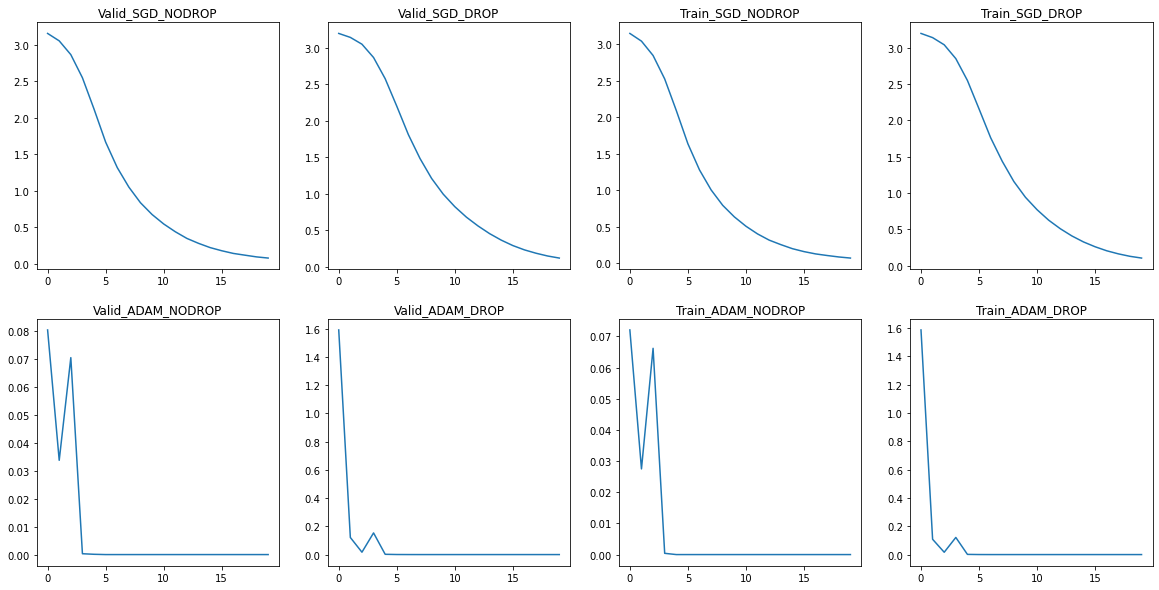

In [246]:
fig, ax = plt.subplots(2,4,figsize=(20, 10))

ax[0,0].plot(np.arange(20),v_l_S_NODROP)
ax[0,0].set_title("Valid_SGD_NODROP")
ax[0,1].plot(np.arange(20),v_l_S_DROP)
ax[0,1].set_title("Valid_SGD_DROP")
ax[0,2].plot(np.arange(20),t_l_S_NODROP)
ax[0,2].set_title("Train_SGD_NODROP")
ax[0,3].plot(np.arange(20),t_l_S_DROP)
ax[0,3].set_title("Train_SGD_DROP")

ax[1,0].plot(np.arange(20),v_l_A_NODROP)
ax[1,0].set_title("Valid_ADAM_NODROP")
ax[1,1].plot(np.arange(20),v_l_A_DROP)
ax[1,1].set_title("Valid_ADAM_DROP")
ax[1,2].plot(np.arange(20),t_l_A_NODROP)
ax[1,2].set_title("Train_ADAM_NODROP")
ax[1,3].plot(np.arange(20),t_l_A_DROP)
ax[1,3].set_title("Train_ADAM_DROP")

As I was reading about this situation happened in this code, II found out that this is the property of ADAM.
link about discussions around SGD or ADAM : https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/

ADAM converge at almost first epochs and find the local minimum very well, If the problem have a lot of proximal global minimum then ADAM is the best. SGD convergence rate with constant learning rate is a topic for discussion and in practical show low rate covergence. As mentioned in the refrence link we should use SGD with momentum to intensify coverge rate and we did exatly the same method with momentum of 0.4.

Overall, SGD needs more epochs to find the global minimum, or local one, and if we want reach exatly zero_error mode we should choose learning rate very small, I did not do that, and run the learning process for more epochs. ADAM find its wat to local minimum with high speed and aill stick in the place.

The real loss and accuracy is higher in the ADAM method which in this step show that SGD are more reliable and can find the global minimum except of local minimum that ADAM found it very soon and easily.

DROPOUT :

The speed of learning increased. This problem have very good local minimas so the results are finally the same but if we look closely, with dropout the result needs more epoch to reach the good situation but we con omit this very little affect and use the low computation property and learn our model with this property.

MODEL:

I used a network with 7 layers. First of all we reduce the fitures to 512 in the first one, In the second layer we reduce the features to 256 and this process continued for third layer and the output is 128. We work with new 128 fiture from past 128 fiture in forth layer and in fifth layer we reduce it to 64 and in sixth layer we create a new 64 feature and finally in the output layer we use 25 feature as a hot one output.
Relu is the activation function and all of the layers all are fully connected. We use the Xaviar initiliazation for weights and updates come from back propagation technique.
The important thing to mention we normalize the test and train pictures to statistical feature of pictures in train set.
85% of data used for train and 15% for validation.

In [247]:
test_acc, test_loss = SGD_NODROP.evaluate(test_dataset, len(test_dataset))
print(f"Final model accuracy on test data is {test_acc}")


Final model accuracy on test data is 79.4617


In [263]:
model = torch.load("path.pt")
# net = torch.load("ADAM_DROP.pt")
# torch.save(net, 'path.pt')

# model.load_state_dict(checkpoint['model_state_dict'])
# model.train()
model.fit(test_dataset, len(test_dataset))

AttributeError: 'collections.OrderedDict' object has no attribute 'fit'

I guess my torch is the old version and I can not load correctly the saved model.
The runtime is very small and you can run it your self for finding the results are reachable or not.

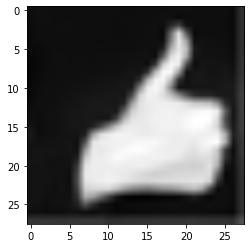

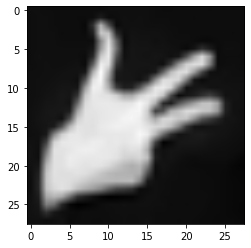

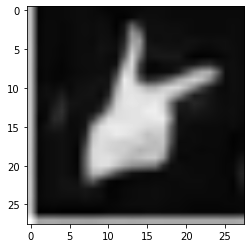

In [296]:
# import matplotlib.image as mpimg
# img = mpimg.imread('../../doc/_static/stinkbug.png')
from PIL import Image

img1 =  Image.open("1.png")
img2 = Image.open("2.png")
img3 = Image.open("3.png")


rsize = img1.resize((28,28))
rsizeArr = np.asarray(rsize)[:,:,0]  # Get array back
imgplot = plt.imshow(rsizeArr, interpolation='bilinear',cmap = 'gray')
plt.show()

rsize1 = img2.resize((28,28))
rsizeArr1 = np.asarray(rsize1)[:,:,0]  # Get array back
imgplot = plt.imshow(rsizeArr1, interpolation='bilinear',cmap = 'gray')
plt.show()

rsize2 = img3.resize((28,28))
rsizeArr2 = np.asarray(rsize2)[:,:,0]  # Get array back
imgplot = plt.imshow(rsizeArr2, interpolation='bilinear',cmap = 'gray')

In [298]:
my_images = [rsizeArr.astype(float), rsizeArr1.astype(float), rsizeArr2.astype(float)]
mu_new, sigma_new = np.array(my_images).mean(), np.array(my_images).std()
normalized = [transform_norm(img) for img in my_images]

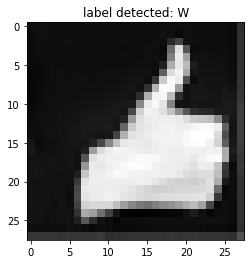

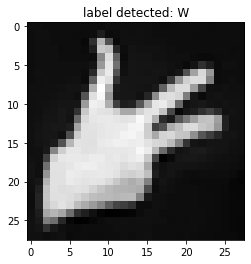

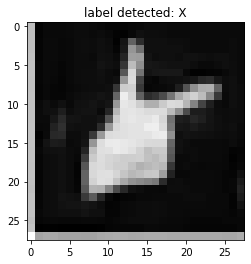

In [303]:
SGD_NODROP.eval()
for i, img in enumerate(normalized):
    with torch.no_grad():
        out = SGD_NODROP.model(img.reshape((1, 784)).float())
        plt.figure()
        plt.imshow(img.numpy()[0], cmap='gray')
        plt.title(f"label detected: " + label[np.int(torch.argmax(out, dim=-1))])
  